In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pip install mysql-connector-python
import mysql.connector

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(r"Google-Playstore.csv")

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

(2312944, 24)

In [4]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [5]:
df.isnull().sum()

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [6]:
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Developer Website    32.894657
Privacy Policy       18.199879
Released              3.071972
Rating                0.989345
Rating Count          0.989345
Minimum Android       0.282324
Size                  0.008474
Currency              0.005837
Minimum Installs      0.004626
Installs              0.004626
Developer Id          0.001427
Developer Email       0.001340
App Name              0.000216
Maximum Installs      0.000000
App Id                0.000000
Category              0.000000
Price                 0.000000
Free                  0.000000
Last Updated          0.000000
Content Rating        0.000000
Ad Supported          0.000000
In App Purchases      0.000000
Editors Choice        0.000000
Scraped Time          0.000000
dtype: float64

In [7]:
#Dropping unnecessary columns
df=df.drop(columns=['Rating','Rating Count','Currency','App Name','App Id','Minimum Installs','Maximum Installs','Editors Choice','Developer Id','Developer Website','Minimum Android','Developer Email','Released','Last Updated','Privacy Policy','Scraped Time'])

In [8]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [9]:
df['Content Rating'].value_counts()

Content Rating
Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Category          object 
 1   Installs          object 
 2   Free              bool   
 3   Price             float64
 4   Size              object 
 5   Content Rating    object 
 6   Ad Supported      bool   
 7   In App Purchases  bool   
dtypes: bool(3), float64(1), object(4)
memory usage: 94.8+ MB


In [11]:
# Display the transformed dataframe
df

,Category,Installs,Free,Price,Size,Content Rating,Ad Supported,In App Purchases
0,Adventure,10+,True,0.0,10M,Everyone,False,False
1,Tools,"5,000+",True,0.0,2.9M,Everyone,True,False
2,Productivity,50+,True,0.0,3.7M,Everyone,False,False
3,Communication,10+,True,0.0,1.8M,Everyone,True,False
4,Tools,100+,True,0.0,6.2M,Everyone,False,False
...,...,...,...,...,...,...,...,...
2312939,Role Playing,"100,000+",True,0.0,77M,Teen,False,False
2312940,Education,100+,True,0.0,44M,Everyone,False,False
2312941,Education,100+,True,0.0,29M,Everyone,False,False
2312942,Music & Audio,"1,000+",True,0.0,10M,Everyone,True,False


In [12]:
df.isnull().sum()

Category              0
Installs            107
Free                  0
Price                 0
Size                196
Content Rating        0
Ad Supported          0
In App Purchases      0
dtype: int64

In [13]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [14]:
def convert_to_mb(size):
    if isinstance(size, str):
        # Remove commas from the string
        size = size.replace(',', '')

        if 'k' in size:
            # Remove 'k' and convert to MB (1 MB = 1024 KB)
            size = float(size.replace('k', '')) / 1024
        elif 'M' in size:
            # Remove 'M' (already in MB)
            size = float(size.replace('M', ''))
        elif 'G' in size:
            # Remove 'G' and convert to MB (1GB = 1024 MB)
            size = float(size.replace('G', '')) * 1024
        elif 'Varies with device' in size:
            return np.nan

    return size

In [15]:
df['Size'] = df['Size'].apply(convert_to_mb)
# Rename the column 'Size' to 'Size_in_Mb'
df.rename(columns={'Size': 'Size_in_Mb'}, inplace=True)

In [16]:
# Repeat the process for Rating
Q1 = df['Size_in_Mb'].quantile(0.25)
Q3 = df['Size_in_Mb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Size_in_Mb'] < lower_bound) | (df['Size_in_Mb'] > upper_bound)]
print("\nOutliers in Size column:")
print(outliers)


Outliers in Size column:
                  Category  Installs  Free  Price  Size_in_Mb Content Rating  \
18               Lifestyle   10,000+  True    0.0        70.0       Everyone   
53        Health & Fitness       10+  True    0.0       147.0       Everyone   
110          Entertainment      100+  True    0.0        67.0           Teen   
136       Health & Fitness       10+  True    0.0        67.0       Everyone   
174      Books & Reference      500+  True    0.0        60.0       Everyone   
...                    ...       ...   ...    ...         ...            ...   
2312861   Health & Fitness   10,000+  True    0.0        61.0       Everyone   
2312887     Travel & Local    1,000+  True    0.0        58.0       Everyone   
2312888          Adventure       10+  True    0.0        73.0       Everyone   
2312929      Entertainment    1,000+  True    0.0        65.0       Everyone   
2312939       Role Playing  100,000+  True    0.0        77.0           Teen   

         Ad S

In [17]:
#Replace null values in size column with median category wise
#As mean values is greater than median and data is +vely skewed hence replacing with median
#df['Size_in_Mb'] = df['Size_in_Mb'].fillna(df.groupby('Category')['Size_in_Mb'].transform('median').round(2))
# Drop rows where 'Size_in_Mb' is null instead of replacing with median
df.dropna(subset=['Size_in_Mb'], inplace=True)


In [18]:
df.isnull().sum()

Category             0
Installs            39
Free                 0
Price                0
Size_in_Mb           0
Content Rating       0
Ad Supported         0
In App Purchases     0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
import pickle

def label_encoding(data, category_col):
    le = LabelEncoder()
    data[category_col] = le.fit_transform(data[category_col])
    
    # Save the label encoding mapping
    label_mapping = {index: label for index, label in enumerate(le.classes_)}
    file_name = "category_col_label_encoded.pkl"
    with open(file_name, "wb") as f:
        pickle.dump(label_mapping, f)
    
    print(f"Label encoding mapping for '{category_col}' saved in '{file_name}'")
    return data[category_col]

# Apply Label Encoding and save mappings separately
df['Category'] = label_encoding(df, 'Category')
df['Content Rating'] = label_encoding(df, 'Content Rating')

# Save Content Rating encoding mapping separately
content_rating_mapping = {index: label for index, label in enumerate(LabelEncoder().fit(df['Content Rating']).classes_)}
file_name = "Content_Rating_label_encoded.pkl"
with open(file_name, "wb") as f:
    pickle.dump(content_rating_mapping, f)

print(f"Label encoding mapping for 'Content Rating' saved in '{file_name}'")

# Verify the result
print(df.head())
print(df['Category'].value_counts())

Label encoding mapping for 'Category' saved in 'category_col_label_encoded.pkl'
Label encoding mapping for 'Content Rating' saved in 'category_col_label_encoded.pkl'
Label encoding mapping for 'Content Rating' saved in 'Content_Rating_label_encoded.pkl'
   Category Installs  Free  Price  Size_in_Mb  Content Rating  Ad Supported  \
0         1      10+  True    0.0        10.0               1         False   
1        42   5,000+  True    0.0         2.9               1          True   
2        33      50+  True    0.0         3.7               1         False   
3        13      10+  True    0.0         1.8               1          True   
4        42     100+  True    0.0         6.2               1         False   

   In App Purchases  
0             False  
1             False  
2             False  
3             False  
4             False  
Category
15    234755
28    152834
8     139041
42    138710
17    134891
24    115733
7     114909
31     87953
21     81129
33     76079


In [20]:
df.columns

Index(['Category', 'Installs', 'Free', 'Price', 'Size_in_Mb', 'Content Rating',
       'Ad Supported', 'In App Purchases'],
      dtype='object')

In [21]:
# Convert to string first, then remove '+' and commas
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '').replace(',', '') if x != 'nan' else '0')

# Convert to integer
df['Installs'] = df['Installs'].astype(np.int64)

# Check the unique values
df['Installs'].unique()


array([        10,       5000,         50,        100,       1000,
              500,      50000,      10000,          1,     500000,
           100000,          5,   10000000,    1000000,    5000000,
                0,  100000000,   50000000, 1000000000,  500000000])

In [22]:
df.shape

(2237971, 8)

In [23]:
df.head()

,Category,Installs,Free,Price,Size_in_Mb,Content Rating,Ad Supported,In App Purchases
0,1,10,True,0.0,10.0,1,False,False
1,42,5000,True,0.0,2.9,1,True,False
2,33,50,True,0.0,3.7,1,False,False
3,13,10,True,0.0,1.8,1,True,False
4,42,100,True,0.0,6.2,1,False,False


In [24]:
# Drop rows where 'Installs' has NaN values
df.dropna(subset=['Installs'], inplace=True)

# Verify the result
print(df['Installs'].isna().sum())  # Should print 0

0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237971 entries, 0 to 2312943
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Category          int64  
 1   Installs          int64  
 2   Free              bool   
 3   Price             float64
 4   Size_in_Mb        float64
 5   Content Rating    int64  
 6   Ad Supported      bool   
 7   In App Purchases  bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 108.8 MB


In [26]:
df.head()

,Category,Installs,Free,Price,Size_in_Mb,Content Rating,Ad Supported,In App Purchases
0,1,10,True,0.0,10.0,1,False,False
1,42,5000,True,0.0,2.9,1,True,False
2,33,50,True,0.0,3.7,1,False,False
3,13,10,True,0.0,1.8,1,True,False
4,42,100,True,0.0,6.2,1,False,False


In [27]:
# boolean columns to 0 and 1
bool_cols = ['Free', 'Ad Supported', 'In App Purchases']
# Fill NaN values with False (0) before converting to integers
df[bool_cols] = df[bool_cols].fillna(False).astype(int)

In [28]:
df.head()

,Category,Installs,Free,Price,Size_in_Mb,Content Rating,Ad Supported,In App Purchases
0,1,10,1,0.0,10.0,1,0,0
1,42,5000,1,0.0,2.9,1,1,0
2,33,50,1,0.0,3.7,1,0,0
3,13,10,1,0.0,1.8,1,1,0
4,42,100,1,0.0,6.2,1,0,0


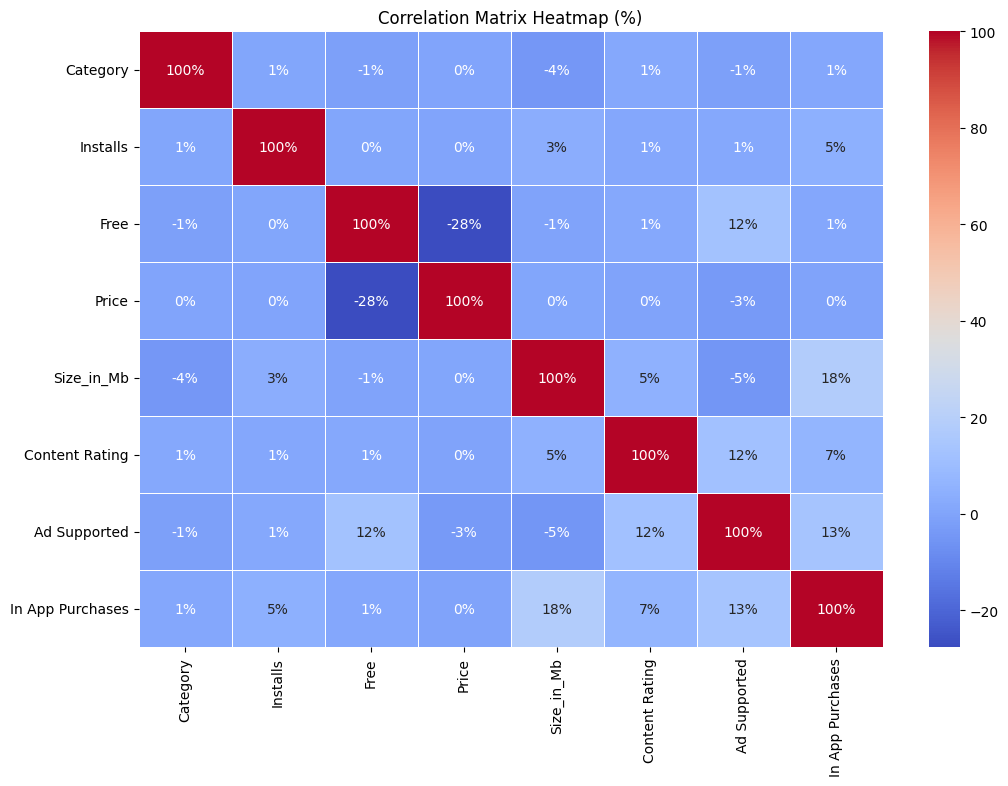

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np



# Assuming df is already preprocessed from your script
# Compute the correlation matrix and convert to percentage
corr_matrix = df.corr() * 100

# Fill NaN values with 0 (or another appropriate value)
annot = corr_matrix.fillna(0).replace([np.inf, -np.inf], 0).round(0).astype(int).astype(str) + '%'

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=annot, cmap='coolwarm', fmt='', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (%)")
plt.show()


In [30]:
# Define bins and labels with specific ranges
bins = [
    0, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000,
    50000000, 100000000, float('inf')
]
labels = [
    'Between 0 and 10k',
    'Between 10k and 50k',
    'Between 50k and 100k',
    'Between 100k and 500k',
    'Between 500k and 1M',
    'Between 1M and 5M',
    'Between 5M and 10M',
    'Between 10M and 50M',
    'Between 50M and 100M',
    'Greater than 100M'
]  # Specific range labels

# Categorize Installs into the new bins
df['Installs_Category'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

# Verify the result
print(df[['Installs', 'Installs_Category']].head())


   Installs  Installs_Category
0        10  Between 0 and 10k
1      5000  Between 0 and 10k
2        50  Between 0 and 10k
3        10  Between 0 and 10k
4       100  Between 0 and 10k


In [31]:
df.drop(['Price','Installs'], axis=1, inplace=True)


In [32]:
# df_sampled = df.sample(n=200000, random_state=42)
df.to_csv("installs_preprocessed.csv", index=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237971 entries, 0 to 2312943
Data columns (total 7 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Category           int64   
 1   Free               int64   
 2   Size_in_Mb         float64 
 3   Content Rating     int64   
 4   Ad Supported       int64   
 5   In App Purchases   int64   
 6   Installs_Category  category
dtypes: category(1), float64(1), int64(5)
memory usage: 121.7 MB


In [ ]:
# Load CSV into Pandas
df = pd.read_csv(r"installs_preprocessed.csv")

# Connect to MySQL
conn = mysql.connector.connect(host="RGVyavahare", user="root", password="root", database="GooglePlayStore")
cursor = conn.cursor()

# Adjusted SQL query without the Price column
for _, row in df.iterrows():
    cursor.execute("""
        INSERT INTO installs_pred (Category, Free, Size_in_Mb, Content_Rating, Ad_Supported, In_App_Purchases, Installs_Category)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))


# Commit and close
conn.commit()
cursor.close()
conn.close()

print("CSV uploaded successfully!")

